In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

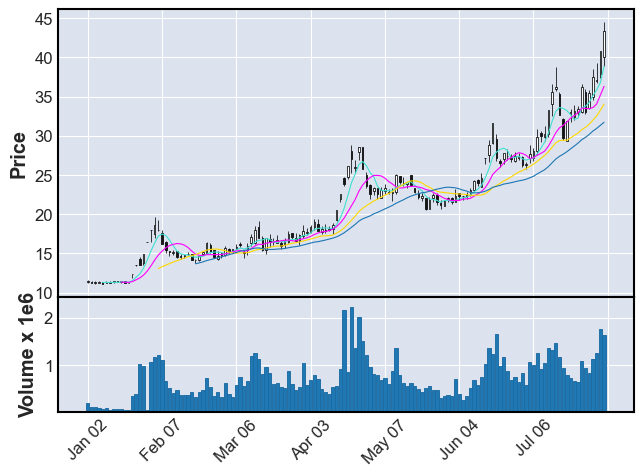

In [6]:
daily = ts.get_k_data("002030", start="2020-01-01", end="2020-08-01")
daily["date"]=pd.to_datetime(daily["date"])
daily = daily.set_index("date")

mpf.plot(daily,type='candle',mav=(5,10,20,30),volume=True)

In [7]:
daily

,open,close,high,low,volume,code
date,,,,,,
2020-01-02,11.31,11.41,11.62,11.22,211267.0,002030
2020-01-03,11.36,11.26,11.45,11.20,110918.0,002030
2020-01-06,11.16,11.32,11.45,11.11,119944.0,002030
2020-01-07,11.27,11.33,11.42,11.26,92799.0,002030
2020-01-08,11.30,11.12,11.31,11.12,82983.0,002030
...,...,...,...,...,...,...
2020-07-27,33.50,35.40,35.87,33.37,829241.0,002030
2020-07-28,35.00,37.53,38.51,34.58,1120657.0,002030
2020-07-29,37.00,37.12,39.26,36.79,1252108.0,002030


In [13]:
pre_close = daily["close"].tolist()[:-1]

In [14]:
daily_2 = daily.iloc[1:,]

In [15]:
daily_2["pre_close"] = pre_close

c:\users\86188\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
daily_2["pct"] = daily_2.apply(lambda x:round(x["close"]/x["pre_close"],2),axis=1)

c:\users\86188\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
daily_2

,open,close,high,low,volume,code,pre_close,pct
date,,,,,,,,
2020-01-03,11.36,11.26,11.45,11.20,110918.0,002030,11.41,0.99
2020-01-06,11.16,11.32,11.45,11.11,119944.0,002030,11.26,1.01
2020-01-07,11.27,11.33,11.42,11.26,92799.0,002030,11.32,1.00
2020-01-08,11.30,11.12,11.31,11.12,82983.0,002030,11.33,0.98
2020-01-09,11.25,11.36,11.43,11.24,90988.0,002030,11.12,1.02
...,...,...,...,...,...,...,...,...
2020-07-27,33.50,35.40,35.87,33.37,829241.0,002030,32.98,1.07
2020-07-28,35.00,37.53,38.51,34.58,1120657.0,002030,35.40,1.06
2020-07-29,37.00,37.12,39.26,36.79,1252108.0,002030,37.53,0.99


In [31]:
daily_3 = daily_2[daily_2["pct"]>=1.05]

In [32]:
daily_3

,open,close,high,low,volume,code,pre_close,pct
date,,,,,,,,
2020-01-20,12.31,12.31,12.31,11.84,346839.0,002030,11.19,1.10
2020-01-21,13.54,13.54,13.54,13.41,390944.0,002030,12.31,1.10
2020-01-23,13.76,14.91,14.93,13.56,975627.0,002030,13.57,1.10
2020-02-03,16.40,16.40,16.40,16.40,63991.0,002030,14.91,1.10
2020-02-04,18.04,18.04,18.04,16.40,1076823.0,002030,16.40,1.10
2020-02-25,15.01,16.32,16.49,14.89,740323.0,002030,15.17,1.08
2020-03-03,14.85,15.74,15.98,14.65,624289.0,002030,14.80,1.06
2020-03-11,15.40,16.00,16.38,14.85,674723.0,002030,15.09,1.06
2020-03-12,16.30,17.14,17.50,15.88,1196314.0,002030,16.00,1.07


In [39]:
np.cumprod(daily_3["pct"])

date
2020-01-20     1.100000
2020-01-21     1.210000
2020-01-23     1.331000
2020-02-03     1.464100
2020-02-04     1.610510
2020-02-25     1.739351
2020-03-03     1.843712
2020-03-11     1.954335
2020-03-12     2.091138
2020-03-13     2.195695
2020-03-18     2.415264
2020-03-26     2.536028
2020-03-31     2.662829
2020-04-15     2.929112
2020-04-16     3.222023
2020-04-17     3.415344
2020-04-20     3.756879
2020-04-23     4.132567
2020-05-12     4.504498
2020-05-25     4.774768
2020-06-10     5.013506
2020-06-15     5.514857
2020-06-16     5.845748
2020-06-17     6.430323
2020-06-22     6.751839
2020-07-03     7.089431
2020-07-07     7.585691
2020-07-10     8.344260
2020-07-13     8.928358
2020-07-17     9.553343
2020-07-23    10.317611
2020-07-27    11.039844
2020-07-28    11.702234
2020-07-30    12.872458
2020-07-31    13.644805
Name: pct, dtype: float64

In [42]:
daily_4 = daily_2[daily_2["pct"]<0.95]

In [43]:
### 未考虑除权
daily_4

,open,close,high,low,volume,code,pre_close,pct
date,,,,,,,,
2020-02-07,17.59,16.21,17.97,16.20,1114804.0,002030,18.00,0.90
2020-02-26,16.06,15.12,16.32,15.01,548219.0,002030,16.32,0.93
2020-03-10,15.11,15.09,15.47,14.41,558462.0,002030,16.01,0.94
2020-03-16,18.39,17.00,19.17,16.98,1134051.0,002030,18.00,0.94
2020-03-17,17.00,15.41,17.20,15.33,817848.0,002030,17.00,0.91
2020-04-08,18.80,17.88,19.33,17.80,709801.0,002030,19.00,0.94
2020-04-24,28.60,25.74,28.60,25.74,1499334.0,002030,28.60,0.90
2020-04-27,25.01,23.59,25.44,23.36,1209172.0,002030,25.74,0.92
2020-05-22,22.00,20.65,22.10,20.52,524938.0,002030,22.29,0.93


In [44]:
np.cumprod(daily_4["pct"])

date
2020-02-07    0.900000
2020-02-26    0.837000
2020-03-10    0.786780
2020-03-16    0.739573
2020-03-17    0.673012
2020-04-08    0.632631
2020-04-24    0.569368
2020-04-27    0.523818
2020-05-22    0.487151
2020-06-18    0.418950
2020-07-15    0.377055
2020-07-16    0.343120
2020-07-24    0.312239
Name: pct, dtype: float64

In [46]:
0.31*13.64

4.2284